In [38]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

In [40]:
df = pd.read_csv("HousingData.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [41]:
column_name = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
non_value_index = []
df[df['CRIM'].isna()].index
for i in column_name:
    for j in list(df[df[i].isna()].index):
        if j not in non_value_index:
            non_value_index.append(j)
            
print("="*12 + "index of non value" + "="*12)
print(non_value_index)
print("="*12, "Length of non value rows", "="*12)
print(len(non_value_index))
    

============index of non value============
[53, 115, 183, 191, 192, 196, 229, 236, 241, 262, 288, 302, 369, 393, 394, 409, 426, 430, 460, 465, 92, 118, 133, 146, 157, 167, 186, 205, 210, 238, 266, 301, 303, 330, 332, 350, 355, 375, 427, 458, 36, 47, 51, 123, 147, 148, 173, 177, 219, 245, 292, 297, 305, 344, 359, 406, 453, 466, 6, 9, 14, 43, 119, 152, 206, 240, 254, 294, 367, 376, 388, 401, 442, 450, 479, 482, 74, 103, 126, 138, 150, 155, 163, 193, 215, 233, 281, 286, 316, 368, 423, 429, 451, 505, 4, 35, 73, 79, 87, 116, 207, 226, 228, 271, 277, 349, 383, 407, 440, 441, 473, 501]
============ Length of non value rows ============
112


In [42]:
# drop missing value
df = df.dropna()
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


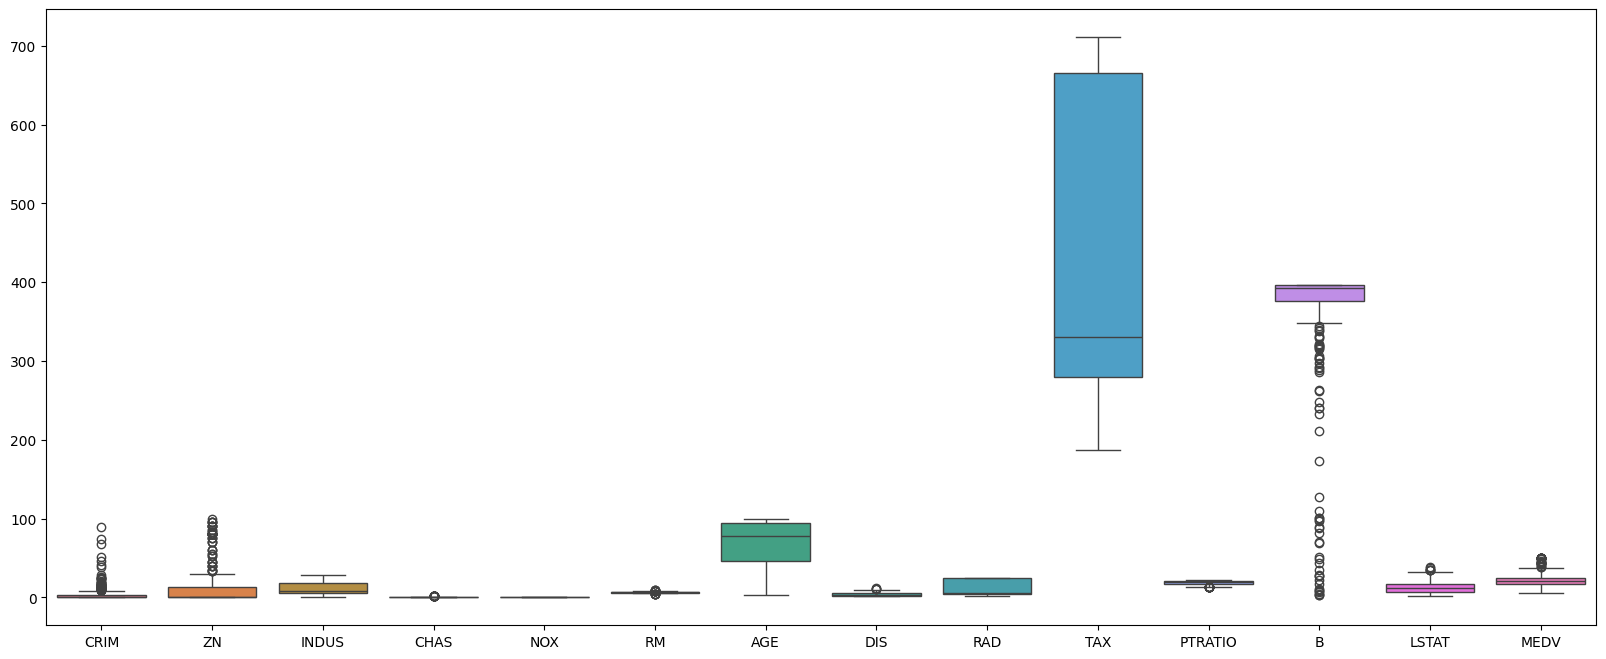

In [44]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [45]:
# creating features and label variable
X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [46]:
# scaling data
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(394, 13)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2)

In [48]:
xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(X_train,Y_train)
scores = cross_val_score(xgbrModel, X_train, Y_train, cv=5)
print("XGBoost 5-fold cross validation b4 feature reduction")
print(list(scores))
print("Mean: ", scores.mean())

XGBoost 5-fold cross validation b4 feature reduction
[0.89776417445652, 0.6663938360468595, 0.828906861216181, 0.8942608612624678, 0.5893784270611784]
Mean:  0.7753408320086412


In [49]:
# estimate importance of feature
impxgb=xgbrModel.feature_importances_
importfeaturesxgr=pd.DataFrame(impxgb,columns=['featureimportant'])
importfeaturesxgr
li_feature_imp = list(importfeaturesxgr["featureimportant"])
li_feature_name = list(X.columns)
feature_list = list(zip(li_feature_name, li_feature_imp))
feature_list = sorted(feature_list, key=lambda x: x[1], reverse=True)

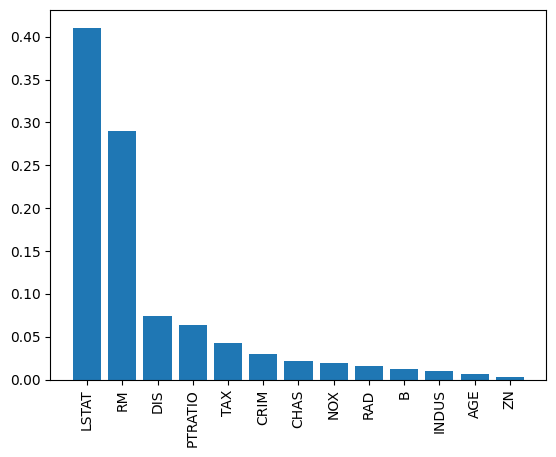

In [50]:
import matplotlib.pyplot as plt
x = [x for x in range(1, len(feature_list)+1)]
h = [x[1] for x in feature_list]
plt.bar(x,h, tick_label=[x[0] for x in feature_list])
plt.xticks(rotation=90)
plt.show()

In [51]:
# drop last one feature
X_drop1 = X.drop(columns = ['ZN'], axis = 1)
X_drop1_scaled = StandardScaler().fit_transform(X_drop1)
X_train_drop1, X_test_drop1, Y_train_drop1, Y_test_drop1 = train_test_split(X_drop1_scaled, y, test_size=0.2)
xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(X_train_drop1,Y_train_drop1)
scores = cross_val_score(xgbrModel, X_train_drop1, Y_train_drop1, cv=5)
predict_y=xgbrModel.predict(X_test_drop1)
print("XGBoost 5-fold cross validation drop one feature")
print(list(scores))
print("Mean: ", scores.mean())
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - Y_test_drop1) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(Y_test_drop1,predict_y)))
print('-'*10 + "R square" + '-'*10)
print(r2_score(Y_test_drop1, predict_y))

XGBoost 5-fold cross validation drop one feature
[0.7461642698374757, 0.8756326188108716, 0.7432211515975927, 0.5339381472019027, 0.8796857988698802]
Mean:  0.7557283972635446
----------MAPE :----------
0.11048095035830681
----------RMSE----------
3.1753375147899496
----------R square----------
0.8699410551170338


In [52]:
# drop last two feature
X_drop2 = X.drop(columns = ['ZN'], axis = 1)
X_drop2 = X.drop(columns = ['B'], axis = 1)
X_drop2_scaled = StandardScaler().fit_transform(X_drop2)
X_train_drop2, X_test_drop2, Y_train_drop2, Y_test_drop2 = train_test_split(X_drop2_scaled, y, test_size=0.2)
xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(X_train_drop2,Y_train_drop2)
predict_y=xgbrModel.predict(X_test_drop2)
scores = cross_val_score(xgbrModel, X_train_drop2, Y_train_drop2, cv=5)
print("XGBoost 5-fold cross validation drop two feature")
print(list(scores))
print("Mean: ", scores.mean())
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - Y_test_drop2) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(Y_test_drop2,predict_y)))
print('-'*10 + "R square" + '-'*10)
print(r2_score(Y_test_drop2, predict_y))

XGBoost 5-fold cross validation drop two feature
[0.817549373009807, 0.7464601906450019, 0.9207832139173373, 0.8389544489870542, 0.795664008144422]
Mean:  0.8238822469407246
----------MAPE :----------
0.1275710866364061
----------RMSE----------
2.9691627862726078
----------R square----------
0.8950532928303225


In [53]:
# drop last three feature
X_drop3 = X.drop(columns = ['ZN'], axis = 1)
X_drop3 = X.drop(columns = ['B'], axis = 1)
X_drop3 = X.drop(columns = ['AGE'], axis = 1)
X_drop3_scaled = StandardScaler().fit_transform(X_drop3)
X_train_drop3, X_test_drop3, Y_train_drop3, Y_test_drop3 = train_test_split(X_drop3_scaled, y, test_size=0.2)
xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(X_train_drop3,Y_train_drop3)
scores = cross_val_score(xgbrModel, X_train_drop3, Y_train_drop3, cv=5)
predict_y=xgbrModel.predict(X_test_drop3)
print("XGBoost 5-fold cross validation drop three feature")
print(list(scores))
print("Mean: ", scores.mean())
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - Y_test_drop3) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(Y_test_drop3,predict_y)))
print('-'*10 + "R square" + '-'*10)
print(r2_score(Y_test_drop3, predict_y))

XGBoost 5-fold cross validation drop three feature
[0.9100862400223402, 0.9438302380372923, 0.6791497558841342, 0.7747462849014055, 0.8253932776421385]
Mean:  0.8266411592974621
----------MAPE :----------
0.10981925858626981
----------RMSE----------
3.048760271772193
----------R square----------
0.8867714622040268


In [54]:
# feature estimation
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.741404,CRIM
1,2.321843,ZN
2,4.049690,INDUS
3,1.069182,CHAS
4,4.495772,NOX
5,2.107004,RM
6,3.173844,AGE
7,3.827427,DIS
8,6.986683,RAD
9,8.651382,TAX


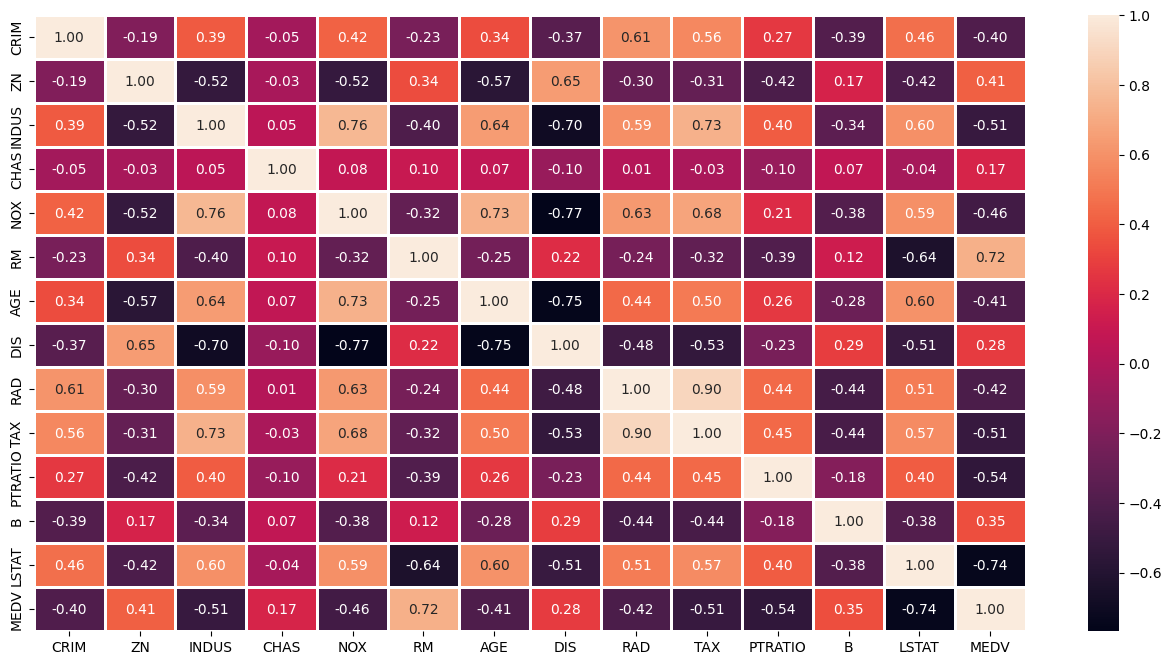

In [55]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [56]:
# drop feature cause variance inflation factor of RAD is greater then 5
X_drop_with_specific_feature = X.drop(columns = ['RAD'], axis = 1)
X_drop_with_specific_feature_scaled = StandardScaler().fit_transform(X_drop_with_specific_feature)
X_train_drop_with_specific_feature, X_test_drop_with_specific_feature, Y_train_drop_with_specific_feature, Y_test_drop_with_specific_feature = train_test_split(X_drop_with_specific_feature_scaled, y, test_size=0.2)
xgbrModel = xgb.XGBRegressor()
xgbrModel.fit(X_train_drop_with_specific_feature,Y_train_drop_with_specific_feature)
scores = cross_val_score(xgbrModel, X_train_drop_with_specific_feature, Y_train_drop_with_specific_feature, cv=5)
predict_y=xgbrModel.predict(X_test_drop_with_specific_feature)
print("XGBoost 5-fold cross validation drop three feature")
print(list(scores))
print("Mean: ", scores.mean())
print('-'*10 + "MAPE :" + '-'*10)
print(np.mean(np.abs((predict_y - Y_test_drop_with_specific_feature) / predict_y)))
print('-'*10 + "RMSE" + '-'*10)
print(np.sqrt(metrics.mean_squared_error(Y_test_drop_with_specific_feature, predict_y)))
print('-'*10 + "R square" + '-'*10)
print(r2_score(Y_test_drop_with_specific_feature, predict_y))

XGBoost 5-fold cross validation drop three feature
[0.8781424194994748, 0.7413931761478585, 0.7754348357588796, 0.7416311898386979, 0.7940494013266148]
Mean:  0.7861302045143052
----------MAPE :----------
0.10913138995441388
----------RMSE----------
4.2081250049170515
----------R square----------
0.7569832859014136
